In [139]:
import pandas as pd
import matplotlib.pyplot as plt

edge_list = pd.read_csv("C:/Users/ECOO33AU/Downloads/data1.txt", sep="\t", comment="#", header=None, names=["From_Node_Id", "To_Node_Id"])

print(edge_list)

       From_Node_Id  To_Node_Id
0                 0           1
1                 0           2
2                 0           3
3                 0           4
4                 0           5
...             ...         ...
20772          6296        5076
20773          6296        5236
20774          6296        6297
20775          6296        6298
20776          6296        6299

[20777 rows x 2 columns]


In [140]:
import numpy as np

n = max(max(edge_list["From_Node_Id"]), max(edge_list["To_Node_Id"])) + 1

adj_matrix = np.zeros((n, n))

for i, j in zip(edge_list["From_Node_Id"], edge_list["To_Node_Id"]):
    adj_matrix[i, j] = 1  
print(adj_matrix)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [141]:
gl_list=[]
for i in range(n):
    count=0
    for j in range(n):
        if(adj_matrix[j][i]==1):
            count+=1
    if count!=0:
        gl_list.append(count)

outdegree=0
for k in gl_list:
    outdegree+=k
print("Total Outdegree:",outdegree)
print("Avg of Outdegree:",outdegree/len(gl_list))

Total Outdegree: 20777
Avg of Outdegree: 3.3398167497186946


In [142]:
print("Number of nodes:", len(adj_matrix))
print("Number of edges:", len(edge_list))

Number of nodes: 6301
Number of edges: 20777


In [143]:
gl_list1=[]
for i in range(n):
    count=0
    for j in range(n):
        if(adj_matrix[i][j]==1):
            count+=1
    if count!=0:
        gl_list1.append(count)
indegree=0
for k in gl_list1:
    indegree+=k
print("Total Indegree:",indegree)
print("Avg of Indegree:",indegree/len(gl_list1))

Total Indegree: 20777
Avg of Indegree: 8.428803245436105


In [144]:
print(indegree/((n*(n-1))/2))

0.0010467978123905755


In [145]:
out_degree_list= edge_list['From_Node_Id']
out_degree_list


0           0
1           0
2           0
3           0
4           0
         ... 
20772    6296
20773    6296
20774    6296
20775    6296
20776    6296
Name: From_Node_Id, Length: 20777, dtype: int64

In [146]:
import collections
out_list=collections.Counter(out_degree_list)

In [147]:
out_degree_list=[]
for i in range(n):
    out_degree_list.append(out_list[i])

In [148]:
In_degree_list= edge_list['To_Node_Id']


In [149]:
In_list=collections.Counter(In_degree_list)


In [150]:
In_degree_list=[]
for i in range(n):
    In_degree_list.append(In_list[i])

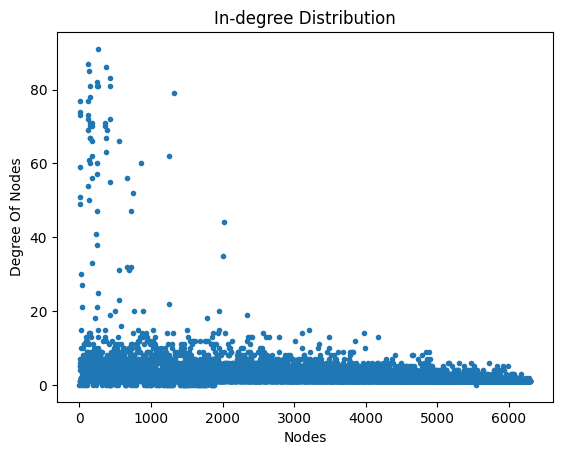

In [151]:
# plt.hist(In_list, bins=50, log=True)
plt.plot(range(len(In_degree_list)),In_degree_list,'.')
plt.title("In-degree Distribution")
plt.xlabel("Nodes")
plt.ylabel("Degree Of Nodes")
plt.show()

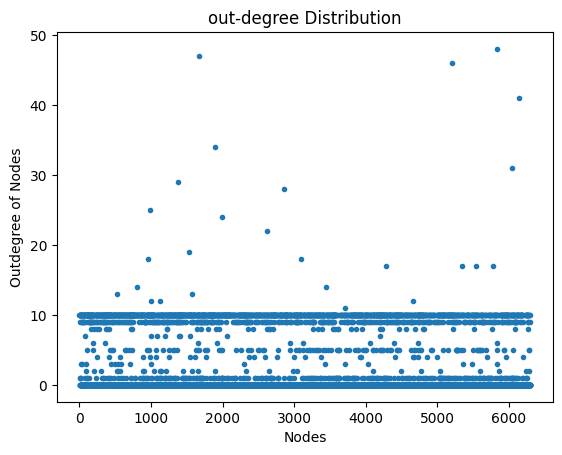

In [152]:
# plt.hist(out_list, bins=50, log=True)
plt.plot(range(len(out_degree_list)),out_degree_list,'.')
plt.title("out-degree Distribution")
plt.xlabel("Nodes")
plt.ylabel("Outdegree of Nodes")
# plt.ylim([0,15])
plt.show()

In [153]:
import numpy as np
# Calculate the local clustering coefficient of each node
triangles = np.dot(adj_matrix, adj_matrix.T)
degree = np.sum(adj_matrix, axis=0)
coefficient = np.zeros(n)
for i in range(n):
    k = degree[i]
    if k >= 2:
        coefficient[i] = triangles[i,i] / (k*(k-1))


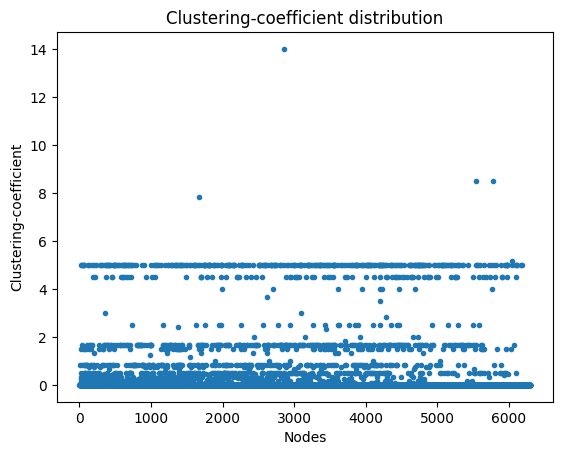

In [154]:
plt.plot(range(len(coefficient)),coefficient,'.')
plt.title("Clustering-coefficient distribution")
plt.xlabel("Nodes")
plt.ylabel("Clustering-coefficient")
plt.show()